In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
aapl = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/apple_2010.csv', index_col='Date', parse_dates=True)
amazon = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/amazon_2010.csv', index_col='Date', parse_dates=True)
SPY = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/sp500_2010.csv', index_col='Date', parse_dates=True)
VIX = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/VIX_2010.csv', index_col='Date', parse_dates=True)
ge= pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/GE_2010.csv', index_col='Date', parse_dates=True)

In [3]:
def cumReturns(df, get_absolute=True):
    start_price= df['Adj Close'].iloc[0]
    end_price=df['Adj Close'].iloc[-1]
    if get_absolute:
        return end_price-start_price
    else:
        return ((end_price-start_price)/start_price)*100
    
    #Absolute is for the dollar gain
    #Typically we just want the normalized percent gain

In [4]:
cumReturns(aapl, get_absolute=False)

2287.802548057404

<AxesSubplot:xlabel='Date'>

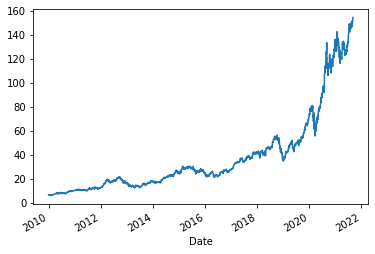

In [6]:
aapl['Adj Close'].plot()

In [7]:
cumReturns(ge, get_absolute=False)

21.713892313221308

<AxesSubplot:xlabel='Date'>

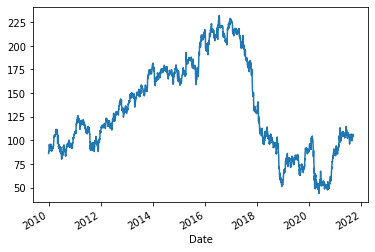

In [8]:
ge['Adj Close'].plot()

In [9]:
cumReturns(SPY, get_absolute=False)

409.1653204351176

<AxesSubplot:xlabel='Date'>

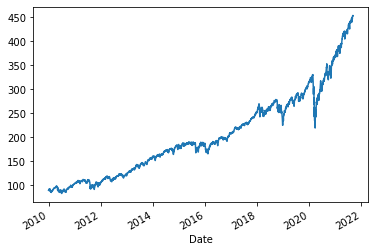

In [10]:
SPY['Adj Close'].plot()

In [11]:
def createAbsReturns(df):
    df['Cumulative Abs. Return']=df['Adj Close']- df['Adj Close'].iloc[0]
    return df

In [15]:
aapl=createAbsReturns(aapl)

In [46]:
ge=createAbsReturns(ge)
amazon=createAbsReturns(amazon)
SPY=createAbsReturns(SPY)
VIX=createAbsReturns(VIX)

In [17]:
ge

,Open,High,Low,Close,Adj Close,Volume,Cumulative Abs. Return
Date,,,,,,,
2009-12-31,117.461540,118.000000,116.384613,116.384613,86.062485,5789108,0.000000
2010-01-04,117.076920,120.307693,116.538460,118.846153,87.882713,8720387,1.820229
2010-01-05,118.923080,120.538460,118.846153,119.461540,88.337753,8391578,2.275269
2010-01-06,119.461540,120.153847,118.769234,118.846153,87.882713,7210437,1.820229
2010-01-07,119.076920,126.769234,118.692307,125.000000,92.433258,24111399,6.370773
...,...,...,...,...,...,...,...
2021-08-30,106.330002,106.459999,104.800003,105.190002,105.190002,7145700,19.127518
2021-08-31,104.940002,106.360001,104.459999,105.410004,105.410004,10990800,19.347519
2021-09-01,105.360001,105.470001,103.260002,103.660004,103.660004,7968100,17.597519


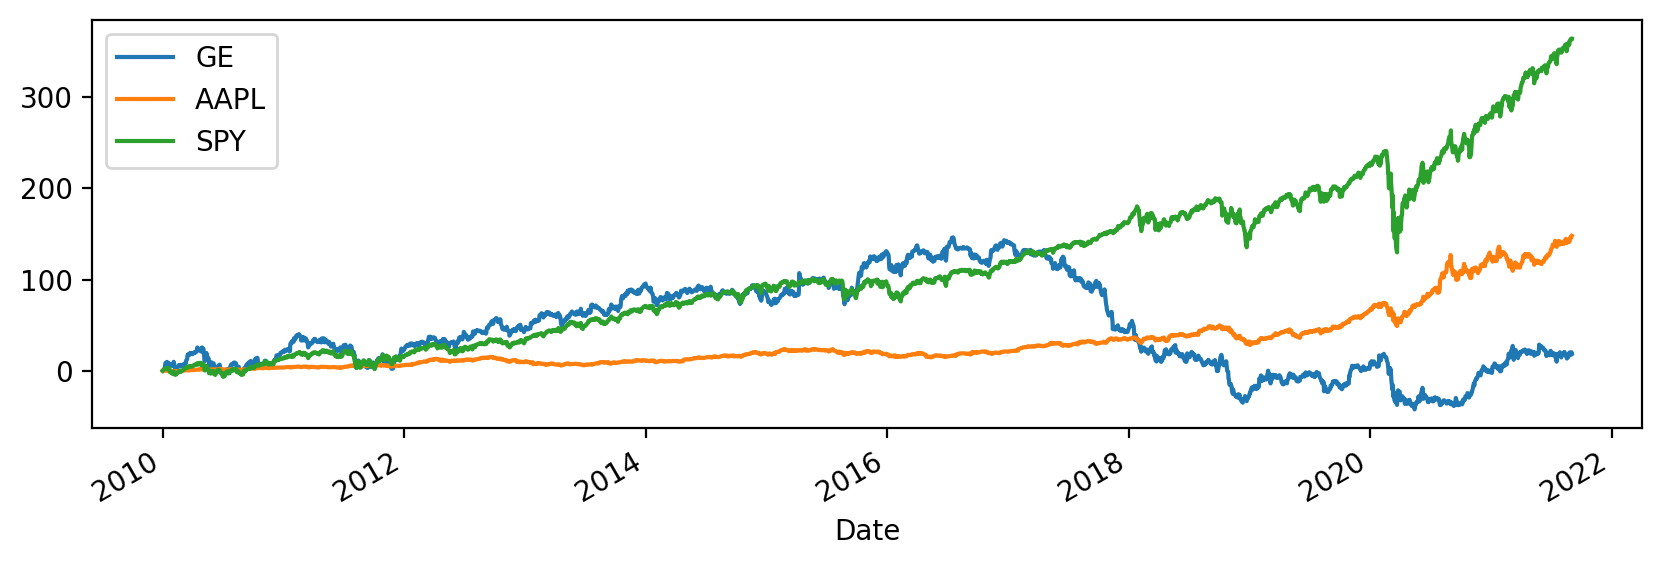

In [35]:
plt.figure(dpi=200, figsize=(10,3))
ge['Cumulative Abs. Return'].plot(label='GE')
aapl['Cumulative Abs. Return'].plot(label='AAPL')
SPY['Cumulative Abs. Return'].plot(label='SPY')
# amazon['Cumulative Abs. Return'].plot(label='Amazon')
plt.legend()


In [29]:
def cumPCTGain(df):
    df['Pct Change']=((df['Adj Close']-df['Adj Close'].iloc[0])/df['Adj Close'].iloc[0])*100
    return df

In [30]:
aapl=cumPCTGain(aapl)

In [31]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Cumulative Abs. Return,Pct Change
Date,,,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.462008,352410800,0.000000,0.000000
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600,0.100582,1.556515
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800,0.111927,1.732071
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000,0.007360,0.113904
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200,-0.004601,-0.071201
...,...,...,...,...,...,...,...,...
2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,146.657987,2269.541849
2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,145.367993,2249.579119
2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,146.047986,2260.102050


In [47]:
ge=cumPCTGain(ge)
SPY=cumPCTGain(SPY)
amazon=cumPCTGain(amazon)
VIX= cumPCTGain(VIX)

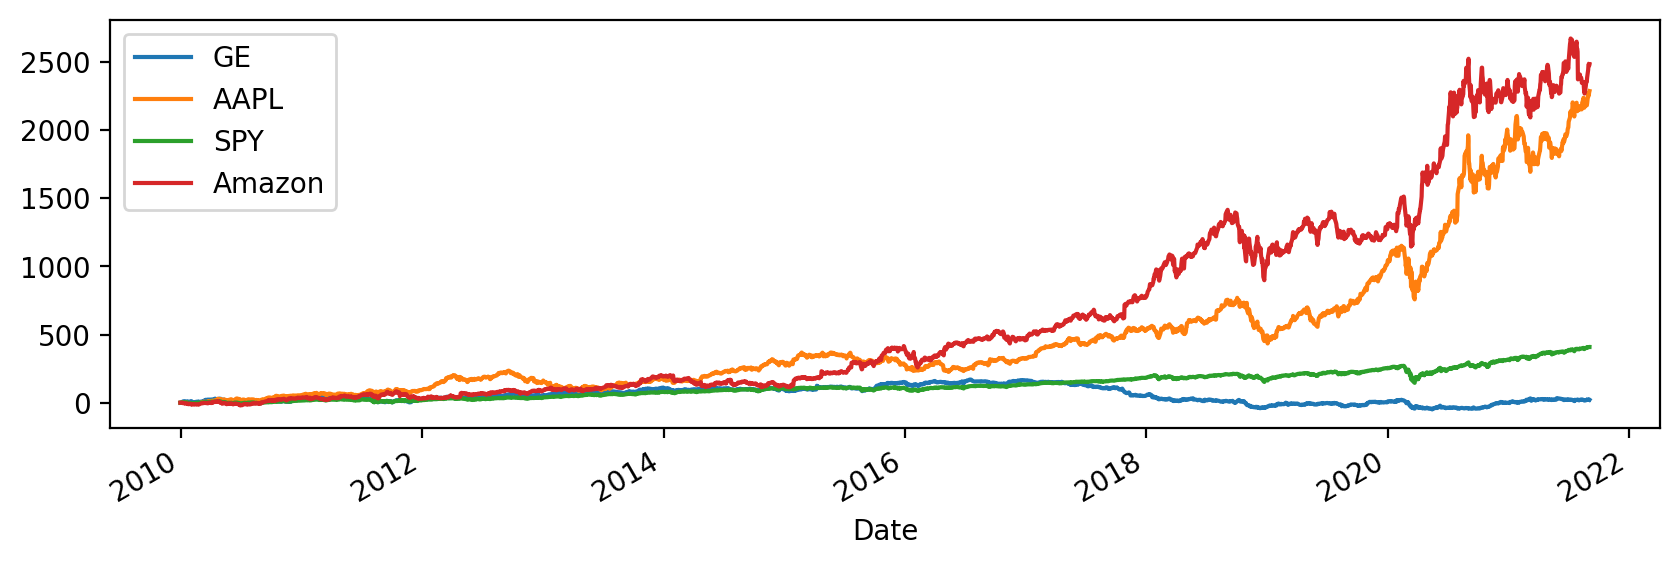

In [34]:
plt.figure(dpi=200, figsize=(10,3))
ge['Pct Change'].plot(label='GE')
aapl['Pct Change'].plot(label='AAPL')
SPY['Pct Change'].plot(label='SPY')
amazon['Pct Change'].plot(label='Amazon')
plt.legend()

In [36]:
# Percent Change allows us to observe a normalized change in price which also allows us to compare
#different holdings as we may hold different assets for different periods of time and they all have different starting
#prices

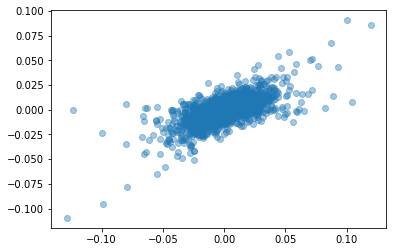

In [42]:
aapl['Daily Ret']=aapl['Adj Close'].pct_change(1)
amazon['Daily Ret']=amazon['Adj Close'].pct_change(1)
SPY['Daily Ret']=SPY['Adj Close'].pct_change(1)
ge['Daily Ret']=ge['Adj Close'].pct_change(1)
plt.scatter(aapl['Daily Ret'], SPY['Daily Ret'], alpha=0.4)


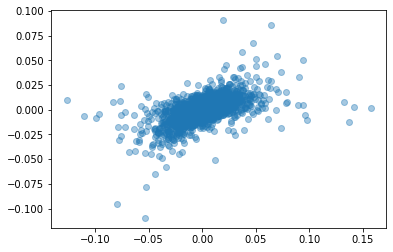

In [43]:
plt.scatter(amazon['Daily Ret'], SPY['Daily Ret'], alpha=0.4)

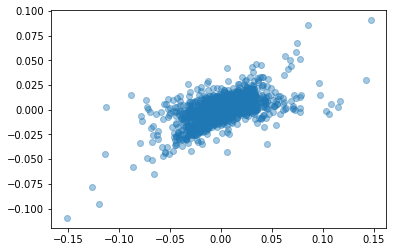

In [44]:
plt.scatter(ge['Daily Ret'], SPY['Daily Ret'], alpha=0.4)

In [45]:
from scipy.stats import linregress

In [48]:
VIX['Daily Ret']=VIX['Adj Close'].pct_change(1)

In [49]:
aapl=aapl.dropna()
amazon=amazon.dropna()
ge=ge.dropna()
SPY=SPY.dropna()
VIX=VIX.dropna()

In [50]:
def betaAlpha(df):
    beta,alpha,_,_,_=linregress(SPY['Daily Ret'], df['Daily Ret'])
    return beta,alpha

In [51]:
betaAlpha(SPY)

(1.0, 0.0)

In [52]:
#This is to test the logic of the linear regression which shows the beta is exactly 1 and there is no alpha 
#for the Sp500 because it is perfectly correlated with itself, so now can test find the beta and alpha for the other
#stocks

In [53]:
betaAlpha(ge)

(1.1488219188566975, -0.00043588058002061957)

In [54]:
betaAlpha(aapl)

(1.0917032604626986, 0.00056985495810669)

In [55]:
betaAlpha(amazon)

(1.0264747996224108, 0.0006735393441121331)

In [56]:
betaAlpha(VIX)

(-5.899407949811443, 0.006742981581293556)

In [57]:
#negative alpha means the company is underperforming and can generate negative returns if the market is doing well

In [58]:
SPLevered = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/sp_leveraged_2010.csv', index_col='Date', parse_dates=True)

In [59]:
SPLevered

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,9.787500,9.787500,9.552500,9.560000,9.009787,33780400
2010-01-04,9.715000,9.887500,9.715000,9.867500,9.299584,43924400
2010-01-05,9.867500,9.937500,9.780000,9.932500,9.360847,38780400
2010-01-06,9.910000,9.990000,9.892500,9.940000,9.367911,42499600
2010-01-07,9.907500,10.047500,9.850000,10.022500,9.445668,45704800
...,...,...,...,...,...,...
2021-08-30,131.880005,133.119995,131.750000,132.619995,132.619995,1258900
2021-08-31,132.550003,132.779999,131.869995,132.309998,132.309998,1763600
2021-09-01,132.809998,133.139999,132.229996,132.380005,132.380005,1402900


In [60]:
SPLevered=createAbsReturns(SPLevered)
SPLevered=cumPCTGain(SPLevered)

In [61]:
SPLevered

,Open,High,Low,Close,Adj Close,Volume,Cumulative Abs. Return,Pct Change
Date,,,,,,,,
2009-12-31,9.787500,9.787500,9.552500,9.560000,9.009787,33780400,0.000000,0.000000
2010-01-04,9.715000,9.887500,9.715000,9.867500,9.299584,43924400,0.289798,3.216478
2010-01-05,9.867500,9.937500,9.780000,9.932500,9.360847,38780400,0.351060,3.896429
2010-01-06,9.910000,9.990000,9.892500,9.940000,9.367911,42499600,0.358125,3.974841
2010-01-07,9.907500,10.047500,9.850000,10.022500,9.445668,45704800,0.435882,4.837868
...,...,...,...,...,...,...,...,...
2021-08-30,131.880005,133.119995,131.750000,132.619995,132.619995,1258900,123.610209,1371.954897
2021-08-31,132.550003,132.779999,131.869995,132.309998,132.309998,1763600,123.300211,1368.514221
2021-09-01,132.809998,133.139999,132.229996,132.380005,132.380005,1402900,123.370218,1369.291235


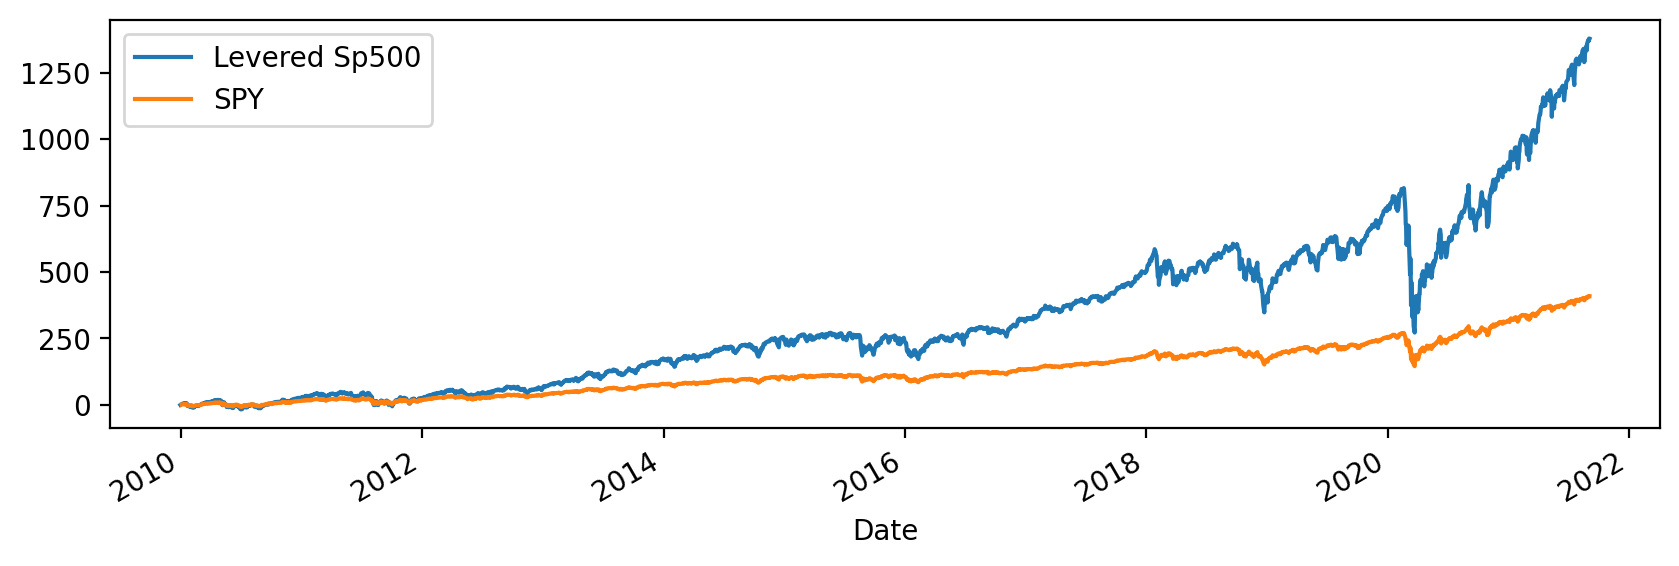

In [63]:
plt.figure(dpi=200, figsize=(10,3))
SPLevered['Pct Change'].plot(label='Levered Sp500')
SPY['Pct Change'].plot(label='SPY')
plt.legend()

In [69]:
SPLevered['Daily Ret']=SPLevered['Adj Close'].pct_change(1)


In [70]:
SPLevered=SPLevered.dropna()

In [71]:
betaAlpha(SPLevered)

(2.010135618299088, -7.749523800499192e-05)